<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-8/SVM/Support_Vector_Machine%20GColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arya Fridayana Gastiadi
##1103210082
##Lecture 8 : Support vector Machines
##Dataset : Heart Failure Clinical Records , Model : SVM
##Dokumentasi Chat GPT :https://chat.openai.com/share/0158ef30-4a5a-416c-a3c6-5e8936dc5803

##Memuat Library

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

##Membaca Data

In [1]:
df = pd.read_csv('/content/sample_data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##Explorisasi Data

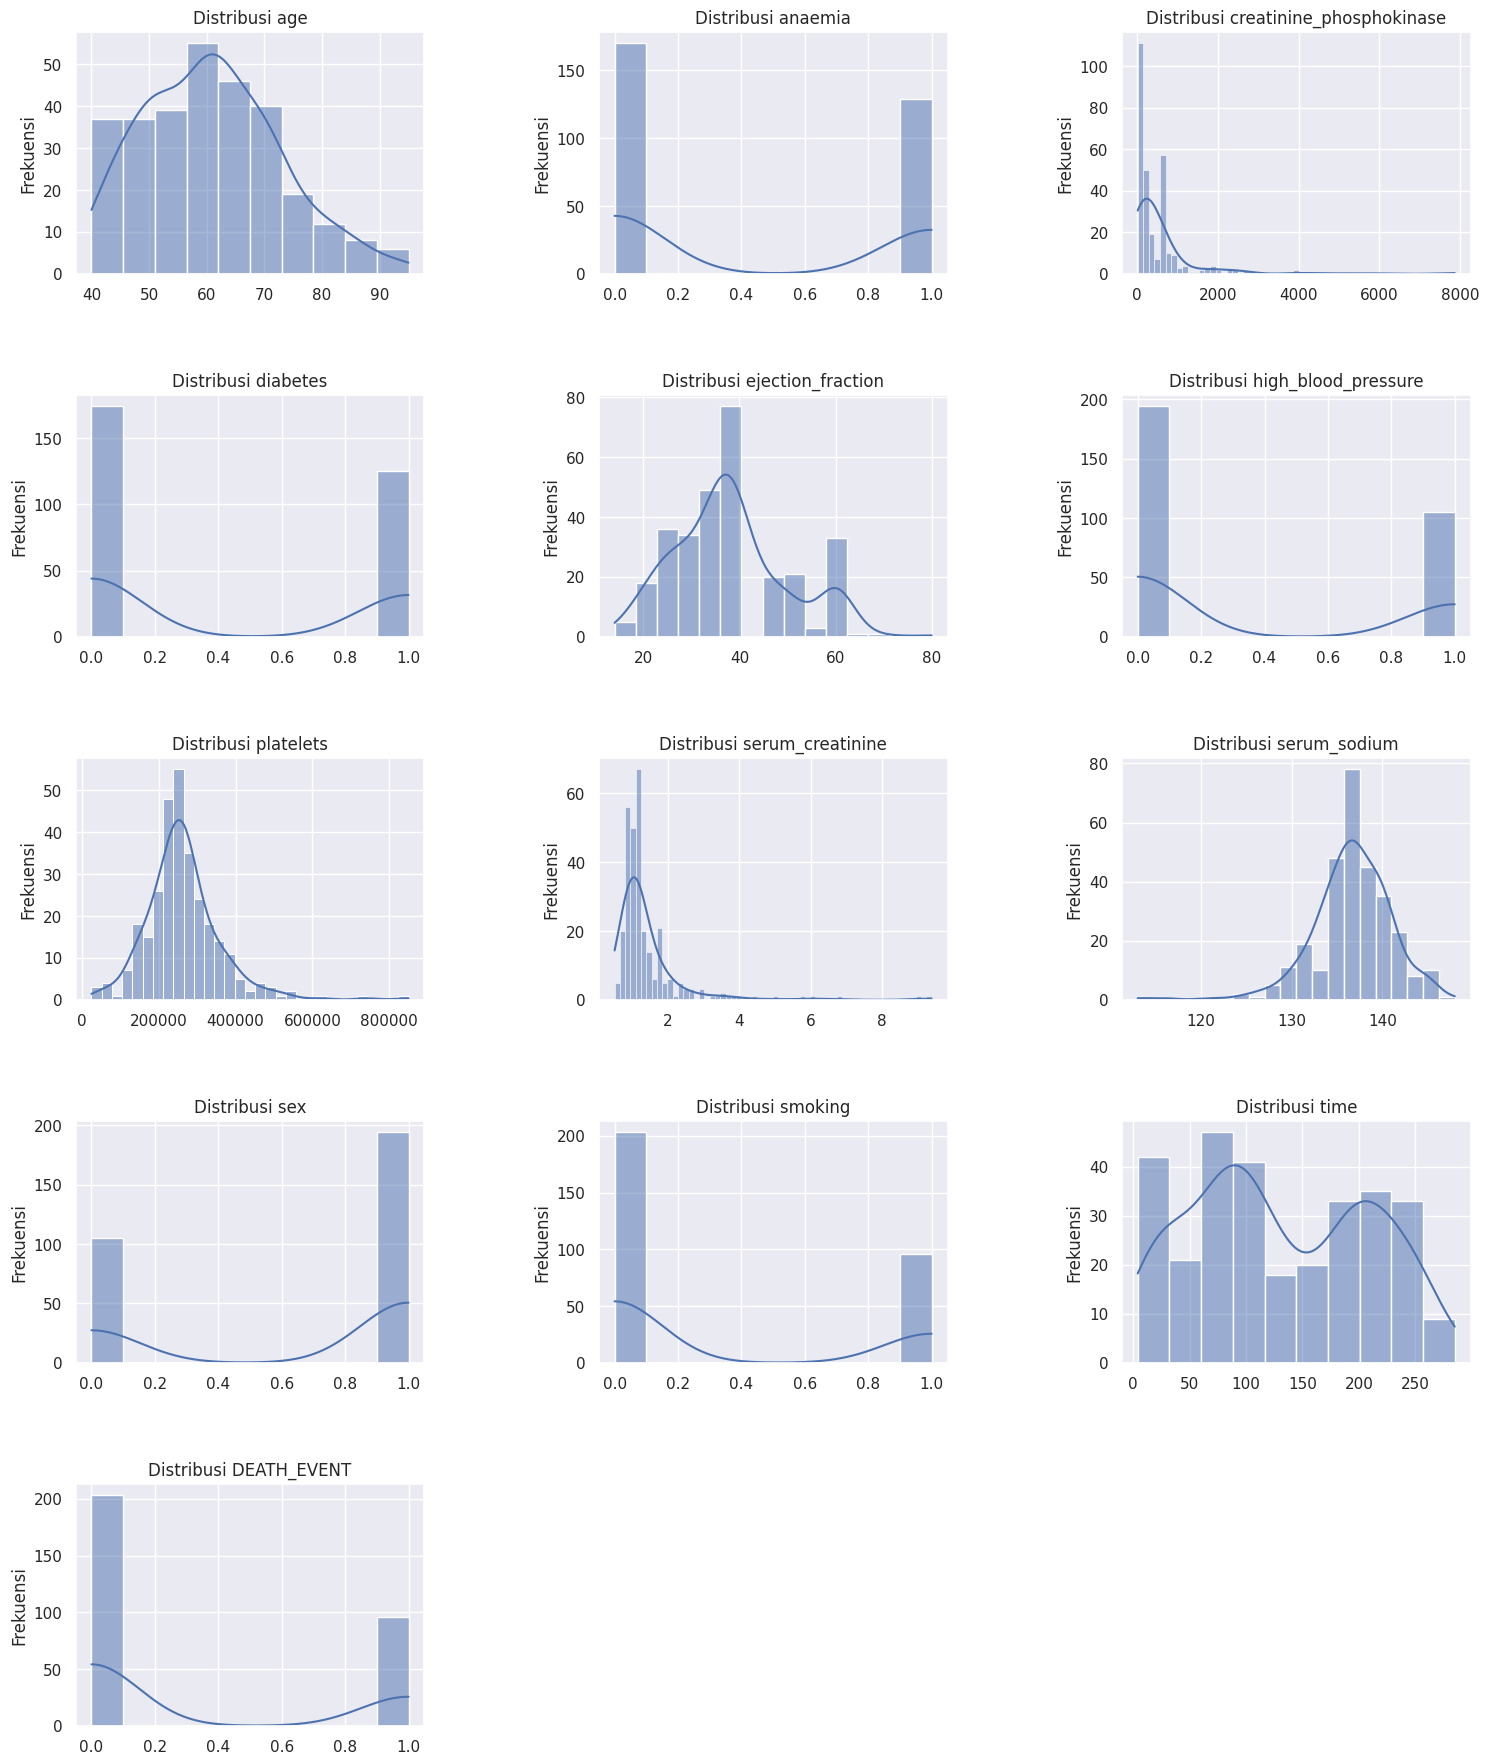

In [6]:
# Menetapkan tema untuk plot dengan seaborn
sns.set_theme()

# Membuat figure dan axes dengan matplotlib
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 22))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()  # Mengubah array 2D dari axes menjadi 1D untuk iterasi yang mudah

# Membuat histogram untuk setiap kolom numerik
for i, col in enumerate(df.columns):
    if df[col].dtype in ['int64', 'float64']:  # Memeriksa jika tipe data adalah numerik
        sns.histplot(df[col], kde=True, ax=axes[i])  # KDE (Kernel Density Estimate) menambahkan estimasi kepadatan kernel
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frekuensi')
    else:
        # Jika kolom kategorikal, buat bar plot
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Distribusi {col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Frekuensi')

# Menghapus axes kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menampilkan plot
plt.show()

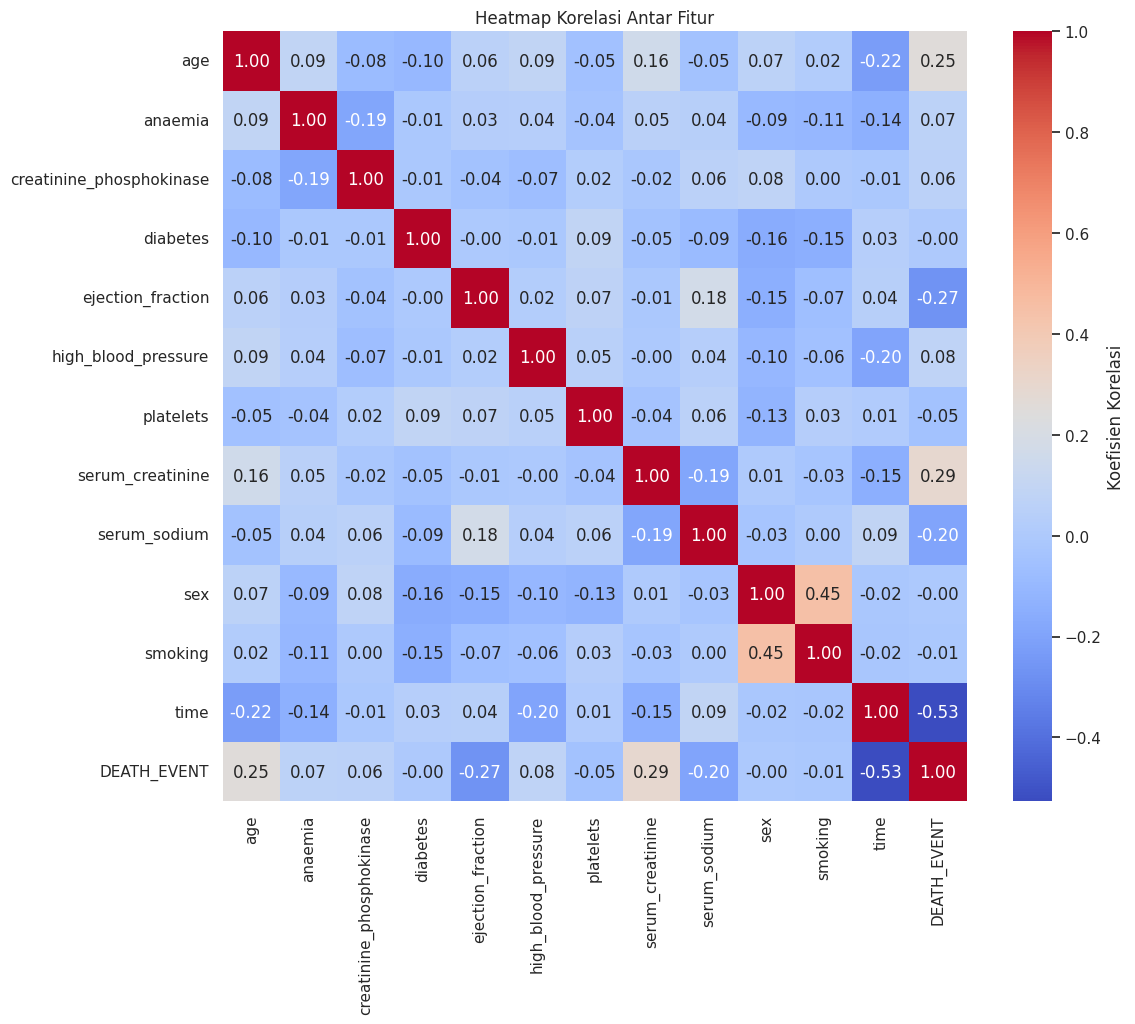

In [7]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))  # Menentukan ukuran gambar
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Koefisien Korelasi'})
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [9]:
# Memisahkan fitur dan target
X = df.drop('DEATH_EVENT', axis=1)  # Fitur
y = df['DEATH_EVENT']  # Target

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat model SVM
svm_model = SVC(kernel='linear')  # Kernel linear dipilih; bisa juga coba 'rbf', 'poly', dll.

# Melatih model SVM
svm_model.fit(X_train_scaled, y_train)

# Memprediksi data test
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[33  2]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Accuracy Score: 0.8


In [13]:
# Mendefinisikan model dan parameter grid
model = SVC()
parameter_grid = {
    'C': [0.1, 1, 10,],  # Regularisasi parameter
    'gamma': [0.1, 1, 10],  # Kernel coefficient untuk 'rbf', 'poly', dan 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']  # Tipe kernel
}

# Grid search untuk menemukan parameter terbaik
grid_search = GridSearchCV(estimator=model, param_grid=parameter_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mendapatkan model terbaik
best_model = grid_search.best_estimator_

# Memprediksi data test dengan model terbaik
y_pred = best_model.predict(X_test_scaled)

# Evaluasi model
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Confusion Matrix:
[[33  2]
 [10 15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60

Accuracy Score: 0.8
